In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

from data import data as dta

In [2]:
def pathMaker(model, optim, epochs,size,boolean):
    return "model%swithOptimoo%s-epochs%s-batch-size%s-relational-batch%s.csv" % (model, optim, epochs, size,boolean)

In [3]:
def latext(model, batch, results):
    return \
        "\\begin{table}[h!]" + "\n    " + \
        "\\begin{footnotesize}" + "\n    " + \
        "\\begin{center}" + "\n    " + \
        "\\begin{tabular}{l|cc:cc:cc}" + "\n    " + \
        "\\toprule" + "\n    " + \
        "Dataset               &   SGD           & SGD \\& \\tecnameAbrv & Adagrad & Adagrad \\& \\tecnameAbrv & Adam        & Adam \\& \\tecnameAbrv \\\\"+ "\n    " + \
        "\\midrule" + "\n"  + \
        results  + "\n    " + \
        "\\bottomrule"  + "\n    " + \
        "\\end{tabular}" + "\n    " + \
        "\\caption{Results with " + str(model) + " and batch of " + str(batch) + "}" + "\n    " + \
        "\\label{tab:results" + str(model).upper() +str(batch)+ "}" + "\n    " + \
        "\\end{center}" + "\n    " + \
        "\\end{footnotesize}" + "\n" + \
        "\\end{table}"


In [4]:
results = {}
models = dta.models # ["mlp", "resnet"]
optims = dta.optims # ["SGD","adagrad", "adam"]
bools = ["False", "True"]
sizes = dta.batch_sizes # ["1", "8", "32", "128"]


dirAbrv = {
                "Adult_Income":    "ACI         ", 
                "compas":          "compas      ", 
                "Dont_Get_Kicked": "DGK         ", 
                "Forest_Cover":    "Forest Cover", 
                "KDD99":           "KDD99       ",
                "Usedcarscatalog": "Used Cars   "}

curve = dict()
for directory in dirAbrv.keys():
    curve[directory] = dict()
    for model in models:
        curve[directory][model] = dict()
        for optim in optims:
            curve[directory][model][optim] = dict()
            for b in bools:
                curve[directory][model][optim][b] = dict()
    

# print(optims)
for size in sizes:
    # print("\nsize: " + size)
    for model in models:
        # print("\nmodel: " + model)
        res = ""
        for dir in os.listdir("results"):
            if dir in dirAbrv.keys():
                if not(".png"  in dir):
                    results["dir"] = dict()
                    path = "results/" + dir
                    files = os.listdir(path)

                    losses = {}
                    printing = "    \\textbf{" + dirAbrv[dir] + "} & "
                    for optim in optims:
                        txts = {}
                        maxis = {}
                        minis = {}
                        for b in bools:
                            p = pathMaker(model,optim,dta.epochs,size,b)
                            if p in files:
                                df = pd.read_csv(path + "/" + p)

                                name = "noRB"
                                if b == "True":
                                    name = "RB"
                                losses["%s with %s" % (optim, name)] = df.test

                                std = np.std(df.test)
                                meanTest = np.mean(df.test)

                                curve[dir][model][optim][b][size] = meanTest
                                # print("model:%s optim:%s rb:%s: %2.2f +- %2.2f" % (model, optim, b, meanTest, std))

                                _maxi = meanTest + std
                                _mini = meanTest - std - 0.01

                                txt = "%2.2f $\pm$ %2.2f" % (meanTest, std)
                                txts[str(b)] = txt
                                maxis[str(b)] = _maxi
                                minis[str(b)] = _mini
                        for b in bools:
                            if p in files:

                                txt = txts[str(b)]
                                if maxis[str(b)] < minis[str(not b)]:
                                    txt = "\\textbf{" + txt + "}"
                                printing = printing + txt+ " & "
                                # print(txt)
                    printing = printing[:-2] + "\\\\"
                    printing = printing.replace("0.00", "0.01")
                    res = res +  printing + " \n"
                    # print(printing)
        ltxt = latext(model, size, res)

        print(ltxt)
        print()
        print()
                    

\begin{table}[h!]
    \begin{footnotesize}
    \begin{center}
    \begin{tabular}{l|cc:cc:cc}
    \toprule
    Dataset               &   SGD           & SGD \& \tecnameAbrv & Adagrad & Adagrad \& \tecnameAbrv & Adam        & Adam \& \tecnameAbrv \\
    \midrule
    \textbf{ACI         } & 0.36 $\pm$ 0.16 & \textbf{0.18 $\pm$ 0.01} & 0.27 $\pm$ 0.07 & \textbf{0.13 $\pm$ 0.01} & 0.36 $\pm$ 0.16 & 0.17 $\pm$ 0.02 \\ 
    \textbf{compas      } & 0.47 $\pm$ 0.28 & 0.24 $\pm$ 0.01 & 0.60 $\pm$ 0.26 & \textbf{0.08 $\pm$ 0.02} & 0.60 $\pm$ 0.19 & 0.38 $\pm$ 0.12 \\ 
    \textbf{DGK         } \\ 
    \textbf{Forest Cover} & 1.98 $\pm$ 0.01 & \textbf{1.95 $\pm$ 0.01} & 1.98 $\pm$ 0.02 & \textbf{1.40 $\pm$ 0.05} & 1.98 $\pm$ 0.01 & 1.96 $\pm$ 0.01 \\ 
    \textbf{KDD99       } & 3.22 $\pm$ 0.12 & \textbf{0.30 $\pm$ 0.07} & 3.10 $\pm$ 0.13 & \textbf{0.17 $\pm$ 0.02} & 3.15 $\pm$ 0.19 & \textbf{0.55 $\pm$ 0.07} \\ 

    \bottomrule
    \end{tabular}
    \caption{Results with mlp and batch of 32}
  

\begin{table}[h!]
    \begin{footnotesize}
    \begin{center}
    \begin{tabular}{l|cc:cc:cc}
    \toprule
    Dataset               &   SGD           & SGD \& \tecnameAbrv & Adagrad & Adagrad \& \tecnameAbrv & Adam        & Adam \& \tecnameAbrv \\
    \midrule
    \textbf{ACI         } & 0.96 $\pm$ 0.58 & \textbf{0.21 $\pm$ 0.02} & 0.98 $\pm$ 0.56 & \textbf{0.17 $\pm$ 0.03} & 0.76 $\pm$ 0.44 & 0.56 $\pm$ 0.35 \\ 
    \textbf{compas      } & 0.64 $\pm$ 0.36 & 0.46 $\pm$ 0.20 & 0.51 $\pm$ 0.36 & 0.28 $\pm$ 0.15 & 0.68 $\pm$ 0.35 & 0.63 $\pm$ 0.32 \\ 
    \textbf{DGK         } \\ 
    \textbf{Forest Cover} & 1.98 $\pm$ 0.02 & 1.98 $\pm$ 0.01 & 1.98 $\pm$ 0.02 & \textbf{1.85 $\pm$ 0.05} & 1.99 $\pm$ 0.02 & 1.98 $\pm$ 0.02 \\ 
    \textbf{KDD99       } & 3.17 $\pm$ 0.19 & \textbf{1.11 $\pm$ 0.24} & 3.10 $\pm$ 0.10 & \textbf{0.21 $\pm$ 0.02} & 3.11 $\pm$ 0.18 & \textbf{1.93 $\pm$ 0.41} \\ 

    \bottomrule
    \end{tabular}
    \caption{Results with mlp and batch of 512}
    \label{tab:resu

In [5]:
curve

{'Adult_Income': {'mlp': {'SGD': {'False': {32: 0.3620972901582718,
     64: 0.36086333990097047,
     128: 0.4056449219584465,
     256: 0.676339116692543,
     512: 0.9582943394780159,
     1024: 0.8954796820878983},
    'True': {32: 0.17613995820283884,
     64: 0.17869397252798078,
     128: 0.18012998700141902,
     256: 0.18743559569120405,
     512: 0.20872470438480378,
     1024: 0.2965186282992363}},
   'adam': {'False': {32: 0.2716782748699188,
     64: 0.2956940993666649,
     128: 0.3341247379779816,
     256: 0.864281290769577,
     512: 0.9769723191857338,
     1024: 1.1799529135227202},
    'True': {32: 0.1301571264863014,
     64: 0.12916349023580548,
     128: 0.1292771086096763,
     256: 0.15459804683923717,
     512: 0.17072593122720714,
     1024: 0.20820807963609692}},
   'adagrad': {'False': {32: 0.3576368421316147,
     64: 0.2974787175655365,
     128: 0.3045310199260712,
     256: 0.6346261754631997,
     512: 0.761968269944191,
     1024: 0.6723675057291985},

In [6]:
def plot_curve(c, dataset, model, size=32):
    d = c[dataset][model]
    x = [i for i in range(0, len(dta.batch_sizes))] # np.log(dta.batch_sizes)
    c = 0
    plt.figure(figsize=(12,8))
    plt.title(model + " on "+ dataset, size=size)
    
    # plt.ylim(0, 1.05)
    for optim in d.keys():
        color = dta.colors[c]
        o = d[optim]
        oTrue = o["True"]
        oFalse = o["False"]
        yTrue = [oTrue[_x] for _x in dta.batch_sizes]
        yFalse = [oFalse[_x] for _x in dta.batch_sizes]
        plt.plot(x, yTrue, '--',color=color, label=optim + " & GSE")
        plt.plot(x, yFalse, color=color, label=optim)
        
        c += 1
    plt.xticks(x, dta.batch_sizes)
    plt.legend(loc=2, fontsize=int(size/2))
    plt.show()
    plt.close()

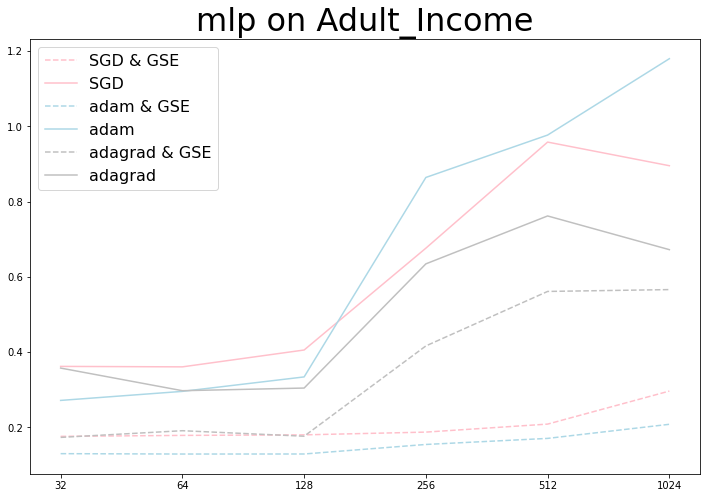

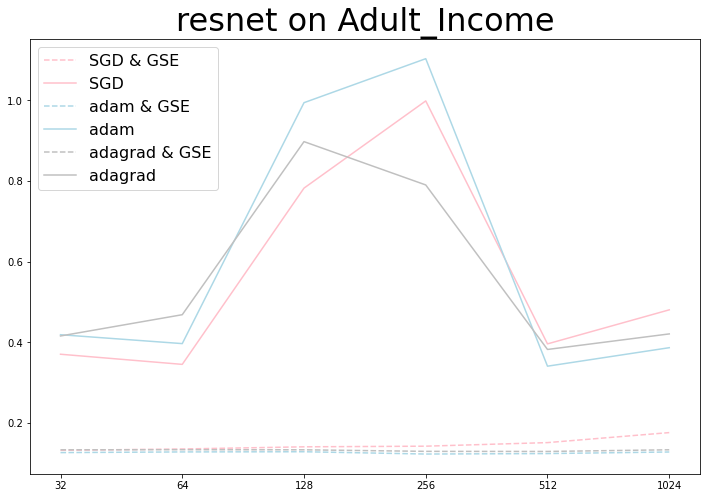

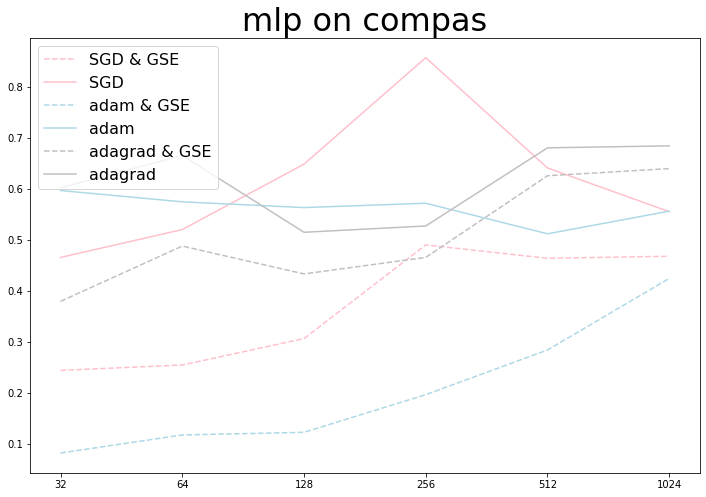

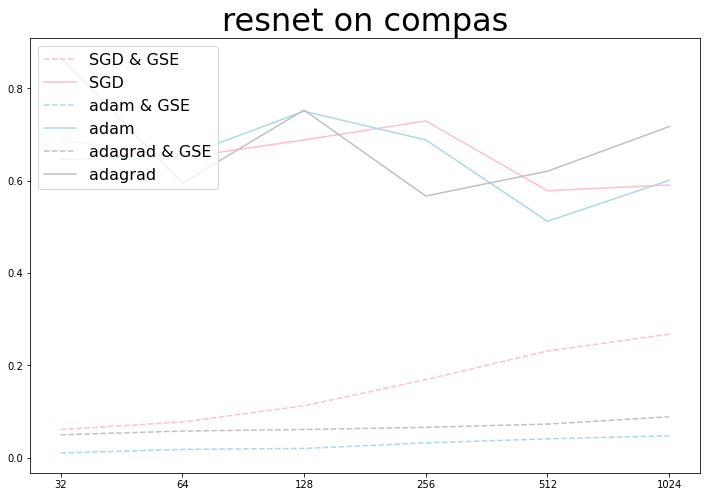

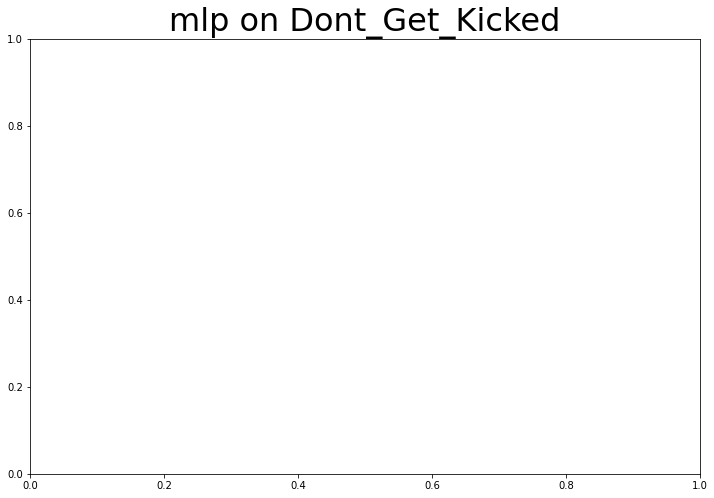

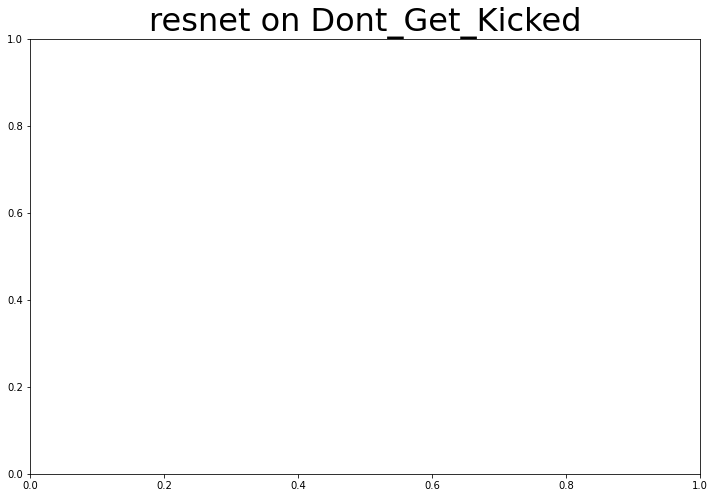

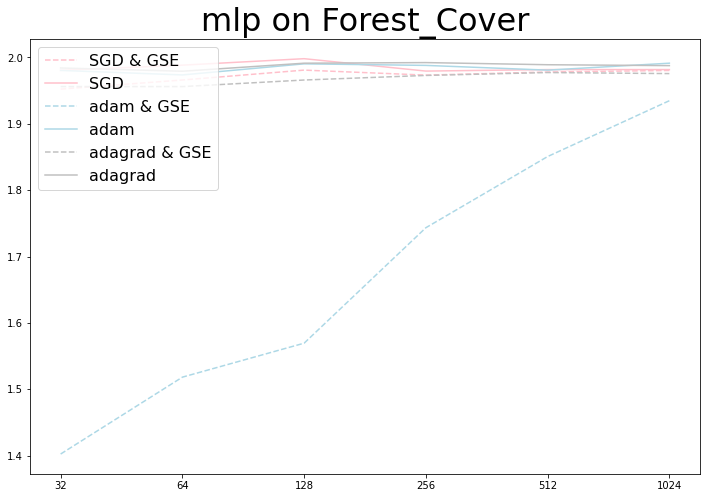

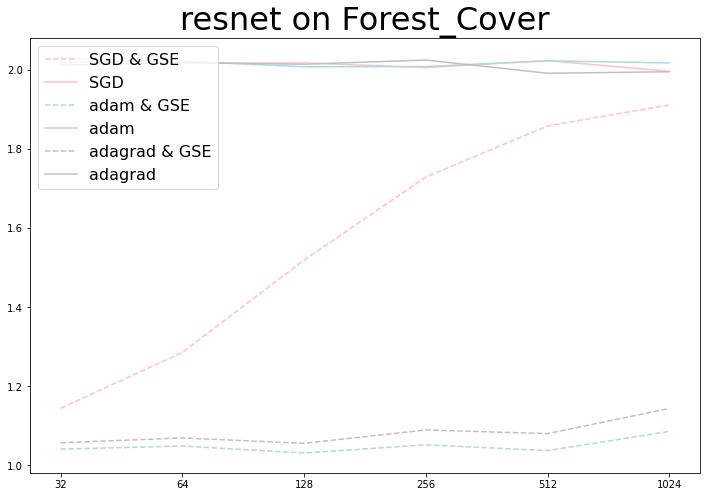

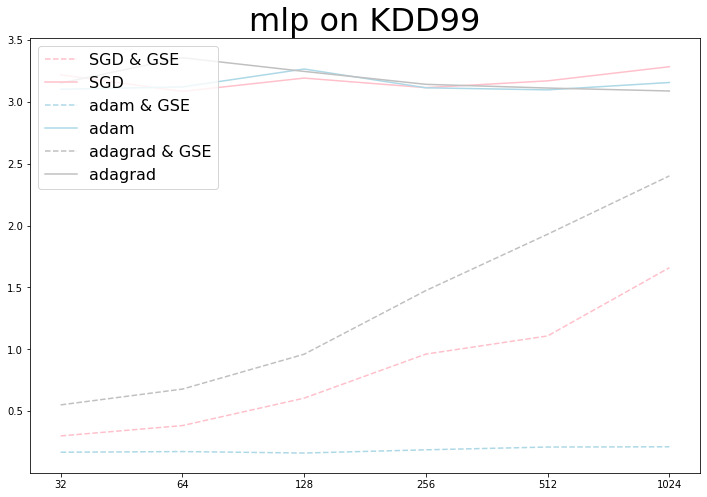

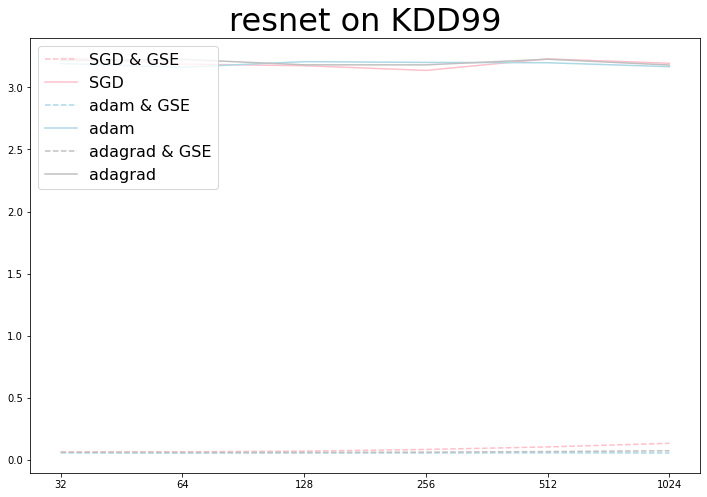

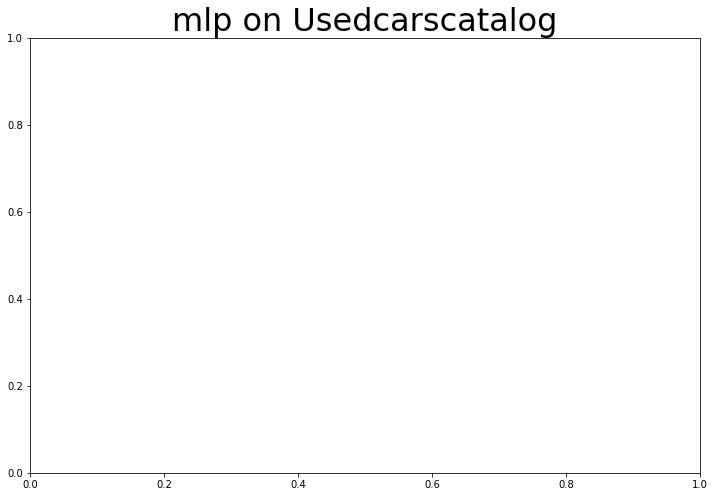

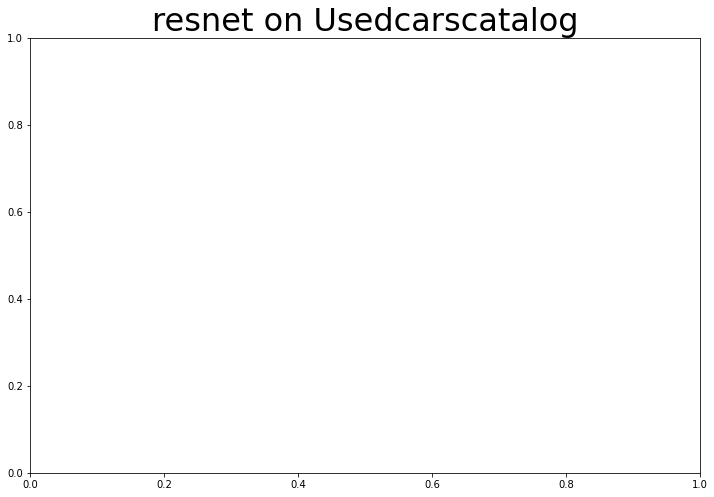

In [7]:
for dataset in curve.keys():
    for model in dta.models:
        try:
            plot_curve(curve, dataset, model)
        except:
            pass

In [8]:
curve["compas"]["mlp"]["SGD"]["True"]

{32: 0.2438785463571548,
 64: 0.2543843537569046,
 128: 0.3061971336603165,
 256: 0.48998273611068727,
 512: 0.46369256675243375,
 1024: 0.4677686706185341}

In [9]:
dta.colors

['pink', 'lightblue', 'silver', 'bisque', 'fushia', 'crimson']